In [1]:
from scipy.special import gamma, factorial
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import sys
from scipy.signal import find_peaks

#nu_0=0.5,x<=30 function converge#
def F_1j_nu_0(nu_0,x):

    if(np.amax(x)>36):
        print('F_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0*np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    F_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=(-1)**s*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        F_1j_nu_0=F_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("F_1j_nu_0 don't converge")
    F_1j_nu_0=amplitude*F_1j_nu_0
    return(F_1j_nu_0)

def G_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>36):
        print('G_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0/np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    G_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=(-1)**s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        G_1j_nu_0=G_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("G_1j_nu_0 don't converge")
    G_1j_nu_0=amplitude*G_1j_nu_0
    return(G_1j_nu_0)

def K_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>36):
        print('K_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=-np.sqrt(nu_0*np.pi/np.sinh(nu_0*np.pi))
    multiplication=1
    K_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=np.sin(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        K_1j_nu_0=K_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("K_1j_nu_0 don't converge")
    K_1j_nu_0=amplitude*K_1j_nu_0
    return K_1j_nu_0

def DF_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>36):
        print('DF_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0*np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    DF_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=-nu_0/2*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(-1)**s*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DF_1j_nu_0=DF_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DF_1j_nu_0 don't converge")
    DF_1j_nu_0=amplitude*DF_1j_nu_0  
    return(DF_1j_nu_0)

def DG_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>36):
        print('DG_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0/np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    DG_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=nu_0/2*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(-1)**s*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DG_1j_nu_0=DG_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DG_1j_nu_0 don't converge")
    DG_1j_nu_0=amplitude*DG_1j_nu_0
    return(DG_1j_nu_0)

def DK_1j_nu_0(nu_0,x):

    if(np.amax(x)>36):
        print('DK_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=-np.sqrt(nu_0*np.pi/np.sinh(nu_0*np.pi))
    multiplication=1
    DK_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=nu_0/2*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DK_1j_nu_0=DK_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DK_1j_nu_0 don't converge")
    DK_1j_nu_0=amplitude*DK_1j_nu_0
    return(DK_1j_nu_0)

def find_bound_state_energy_function(EE):
    Num_E=np.size(EE)
    find_bound_state_energy_function=np.zeros(Num_E)
    for i in np.arange(0,Num_E):
        E=EE[i]
        tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
        if(-1-hbar**2*tilde_alpha**2/(2*M*E*rho_0**2)>0):
            factor=np.sqrt(-1-hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
            x_1=np.sqrt(-2*M*E)*rho_0/hbar
            x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
            find_bound_state_energy_function[i]=DK_1j_nu_0(tilde_alpha,x_1)/K_1j_nu_0(tilde_alpha,x_1)-factor*special.jvp(0,x_2)/special.jv(0,x_2)
        else:
            factor=np.sqrt(1+hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
            x_1=np.sqrt(-2*M*E)*rho_0/hbar
            x_3=np.sqrt(-2*M*E*rho_0**2/hbar**2-tilde_alpha**2)
            find_bound_state_energy_function[i]=DK_1j_nu_0(tilde_alpha,x_1)/K_1j_nu_0(tilde_alpha,x_1)-factor*special.ivp(0,x_3)/special.iv(0,x_3)

    return find_bound_state_energy_function

def A(E,rho_0,alpha):
    tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
    x_1=np.sqrt(2*M*E)/hbar*rho_0
    x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    factor=np.sqrt(1+hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
    A1=DG_1j_nu_0(tilde_alpha,x_1)*special.jn(0,x_2)+factor*special.jn(1,x_2)*G_1j_nu_0(tilde_alpha,x_1)
    A2=F_1j_nu_0(tilde_alpha,x_1)*DG_1j_nu_0(tilde_alpha,x_1)-DF_1j_nu_0(tilde_alpha,x_1)*G_1j_nu_0(tilde_alpha,x_1)
    A=A1/A2
    return A

def B(E,rho_0,alpha):
    tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
    x_1=np.sqrt(2*M*E)/hbar*rho_0
    x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    factor=np.sqrt(1+hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
    B1=DF_1j_nu_0(tilde_alpha,x_1)*special.jn(0,x_2)+factor*special.jn(1,x_2)*F_1j_nu_0(tilde_alpha,x_1)
    B2=F_1j_nu_0(tilde_alpha,x_1)*DG_1j_nu_0(tilde_alpha,x_1)-DF_1j_nu_0(tilde_alpha,x_1)*G_1j_nu_0(tilde_alpha,x_1)
    B=-B1/B2
    return B

def C(E,rho_0,alpha):
    tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
    x_1=np.sqrt(-2*M*E)*rho_0/hbar
    x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    x_3=np.sqrt(-2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    if(tilde_alpha**2/rho_0**2>-2*M*E/hbar**2):
        C=special.jv(0,x_2)/K_1j_nu_0(tilde_alpha,x_1)
    else:
        C=special.iv(0,x_3)/K_1j_nu_0(tilde_alpha,x_1)    
        
    return C

def D(E,rho_0,alpha,l):
    tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
    if(tilde_nu**2/rho_0**2>2*M*E/hbar**2):
        factor=np.sqrt(hbar**2*tilde_nu**2/(2*M*E*rho_0**2)-1)
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(-2*M*E*rho_0**2/hbar**2+tilde_nu**2)
        D1=special.iv(0,x_2)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))+2*factor*special.iv(1,x_2)*special.yv(tilde_nu,x_1)
        D2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        D=D1/D2
    else:
        factor=np.sqrt(1-hbar**2*tilde_nu**2/(2*M*E*rho_0**2))
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(2*M*E*rho_0**2/hbar**2-tilde_nu**2)
        D1=special.jv(0,x_2)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))+2*factor*special.jv(1,x_2)*special.yv(tilde_nu,x_1)
        D2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        D=D1/D2
    
    return D

def L(E,rho_0,alpha,l):
    tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
    if(tilde_nu**2/rho_0**2>2*M*E/hbar**2):
        factor=np.sqrt(hbar**2*tilde_nu**2/(2*M*E*rho_0**2)-1)
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(-2*M*E*rho_0**2/hbar**2+tilde_nu**2)
        L1=special.iv(0,x_2)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))+2*factor*special.iv(1,x_2)*special.jv(tilde_nu,x_1)
        L2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        L=-L1/L2
    else:
        factor=np.sqrt(1-hbar**2*tilde_nu**2/(2*M*E*rho_0**2))
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(2*M*E*rho_0**2/hbar**2-tilde_nu**2)
        L1=special.jv(0,x_2)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))+2*factor*special.jv(1,x_2)*special.jv(tilde_nu,x_1)
        L2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        L=-L1/L2
    return L

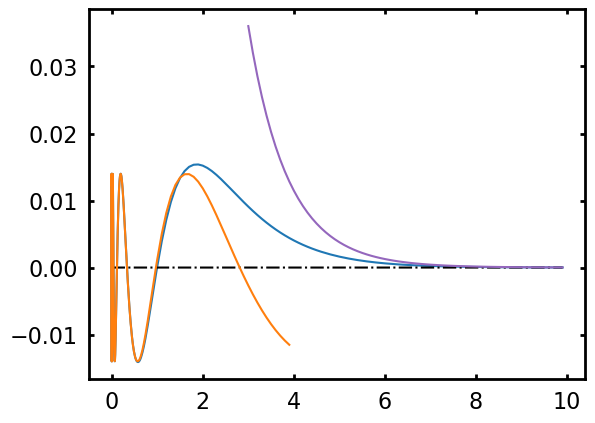

In [2]:
######  Figure 2 ##########################################
import numpy as np

###########################    parameter   ##################################################################################
M = 9.109e-31#kg
hbar = 1.055e-34#m^2kg/s
rho_0 = 2e-10#m
E_0 = 1.6e-19#J

alpha = 1/6
tilde_alpha = np.sqrt(1-alpha**2)*0.5/alpha
phi=np.angle(gamma(1+1j*tilde_alpha))

x_1 = 1/10**np.arange(10,0,-0.01)
x_2 = np.arange(1,10,0.1)
x_3 = np.arange(1,4,0.1)

############################    plot data   ###############################################################################
x_blue = np.append(x_1,x_2)
blue = K_1j_nu_0(tilde_alpha,x_blue)

x_purple = np.arange(3,10,0.1)
purple = np.sqrt(np.pi/2/x_purple)*np.exp(-x_purple)

x_orange = np.append(x_1,x_3)
orange = -np.sqrt(tilde_alpha*np.pi/np.sinh(tilde_alpha*np.pi))/tilde_alpha*np.sin(tilde_alpha*np.log(x_orange/2)-phi)

###############################   plot   ################################################################
plt.plot(x_blue, blue, color='tab:blue')
plt.plot(x_blue, 0*x_blue, 'k-.')
plt.plot(x_purple, purple, color='tab:purple')
plt.plot(x_orange, orange, color='tab:orange')


#######################  ticks in #################################################################
plt.tick_params(axis="y",direction="in", pad=8)
plt.tick_params(axis="x",direction="in", pad=8)
plt.tick_params(top='on',bottom='on',left='on',right='on')


#####################    width of axis ################################################
font=16
wid=2
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=wid)
ax.xaxis.set_tick_params(width=wid)
ax.yaxis.set_tick_params(width=wid)

###################    size of ticket label  ################################################
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)

plt.savefig('Fig2-a.pdf')

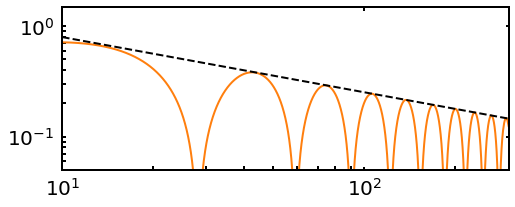

In [2]:
######################   Figure 3 ##################################################################


########################    parameter and data  ##########################################################
M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

alpha=0.3*np.pi
tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)

E=0.01#np.exp(np.arange(-60,-10,0.1))
rho=np.arange(10,300,0.01)
R=np.absolute((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-\
               F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))\
              /np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))
y=np.sqrt(2/(np.pi*np.sqrt(E)*rho))


########################   plot           ###################################################################
fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 3)

plt.plot(rho,R,'tab:orange',linewidth=2)
plt.plot(rho,y,'k--',linewidth=2)

plt.xscale('log')
plt.yscale('log')

plt.ylim([0.05,1.5])
plt.xlim([10,300])

############################   tick in and width   ########################################
plt.xticks(fontsize=20)
plt.yticks([0.05,0.1,1],fontsize=20)
plt.tick_params(top='on',bottom='on',left='on',right='on')
plt.tick_params(axis="y",direction="in", pad=8,width=2)
plt.tick_params(axis="x",direction="in", pad=8,width=2)
plt.tick_params(which="minor",axis="x",direction="in", pad=8,width=2,length=4)
plt.tick_params(which="minor",axis="y",direction="in", pad=8, width=2, length=4)

wid=2
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=wid)
ax.xaxis.set_tick_params(width=wid)

plt.savefig('Fig3-a.pdf')

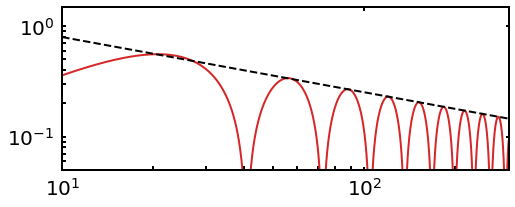

In [3]:
######################   Figure 3 ##################################################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

alpha=0.3*np.pi
tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)

E=0.01#np.exp(np.arange(-60,-10,0.1))
rho=np.arange(10,300,0.01)
l=1
tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
R=np.absolute(special.jv(tilde_nu,np.sqrt(E)*rho))
y=np.sqrt(2/(np.pi*np.sqrt(E)*rho))

fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 3)

plt.plot(rho,R,'tab:red',linewidth=2)
plt.plot(rho,y,'k--',linewidth=2)

plt.xscale('log')
plt.yscale('log')

plt.ylim([0.05,1.5])
plt.xlim([10,300])

plt.xticks(fontsize=20)
plt.yticks([0.05,0.1,1],fontsize=20)
plt.tick_params(top='on',bottom='on',left='on',right='on')
plt.tick_params(axis="y",direction="in", pad=8,width=2)
plt.tick_params(axis="x",direction="in", pad=8,width=2)
plt.tick_params(which="minor",axis="x",direction="in", pad=8,width=2,length=4)
plt.tick_params(which="minor",axis="y",direction="in", pad=8, width=2, length=4)

wid=2
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=wid)
ax.xaxis.set_tick_params(width=wid)
plt.savefig('Fig3-b.pdf')

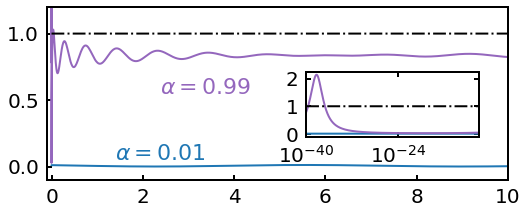

In [229]:
############   Figure 4   ######################################################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19#J

r=10
EE_1=1/10**np.arange(40,0,-0.01)
EE_2=np.arange(1,10,0.01)#np.exp(np.arange(-20,1,0.01))
EE=np.append(EE_1,EE_2)
Alpha=np.array([0.01,0.99])
ll=np.arange(-50,50,1)

Num_E=np.size(EE)
Num_l=np.size(ll)
Num_Alpha=np.size(Alpha)

LDOS=np.zeros((Num_Alpha,Num_E))

for k in np.arange(0,Num_Alpha):
              
    alpha=Alpha[k]
    tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha
    for i in np.arange(0,Num_E):

        E=EE[i]

        x_1=np.sqrt(E)*r
        x_2=np.sqrt(E)

        for j in np.arange(0,Num_l):
            l=ll[j]
            if l==0:
                LDOS[k,i]=LDOS[k,i]+((G_1j_nu_0(tilde_alpha,x_2)*F_1j_nu_0(tilde_alpha,x_1)-F_1j_nu_0(tilde_alpha,x_2)*G_1j_nu_0(tilde_alpha,x_1))/np.sqrt(G_1j_nu_0(tilde_alpha,x_2)**2+F_1j_nu_0(tilde_alpha,x_2)**2))**2
            else:
                tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
                LDOS[k,i]=LDOS[k,i]+(special.jv(tilde_nu,x_1))**2 
EEE=EE
LDOS_3=np.ones(Num_E)

fig = plt.figure()
fig.set_size_inches(8, 3)

left, bottom, width, height = 0.15,0.15,0.8,0.8
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(EEE,LDOS[0,:],'tab:blue',linewidth=2)
ax1.plot(EEE,LDOS[1,:],'tab:purple',linewidth=2)
ax1.plot(EEE,LDOS_3,'k-.',linewidth=2)
#ax1.legend(prop={"size":16},loc='lower right')
ax1.set_xlim([-0.1,10])
ax1.set_ylim([-0.1,1.2])
# ax1.set_xticks([0,2,4,6,8,10])
ax1.set_yticks([0,0.5,1.0])
# ax1.set_xticklabels(fontsize=14)
# ax1.set_yticklabels(fontsize=14)
ax1.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='y', which='major', labelsize=20)
# ax1.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax1.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax1.text(0.4, 0.9,r'$\alpha=0.99$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='tab:purple', fontsize=22)
ax1.text(0.3, 0.3,r'$\alpha=0.01$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='tab:blue', fontsize=22)
plt.setp(ax1.spines.values(), linewidth=2)
ax1.xaxis.set_tick_params(width=2,length=5)
ax1.yaxis.set_tick_params(width=2,length=5)
left, bottom, width, height = 0.6,0.35,0.3,0.3
ax2 = fig.add_axes([left,bottom,width,height])
ax2.plot(EEE[:3000],LDOS[0,:3000],'tab:blue',linewidth=2)
ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
ax2.plot(EEE[:3000],LDOS_3[:3000],'k-.',linewidth=2)
ax2.set_xscale('log')
ax2.set_yticks([0,1,2])
ax2.tick_params(top='on',bottom='on',left='on',right='on')
ax2.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax2.spines.values(), linewidth=2)
ax2.xaxis.set_tick_params(width=2,length=5)
ax2.yaxis.set_tick_params(width=2,length=5)
# ax2.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax2.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Fig4-a.pdf')

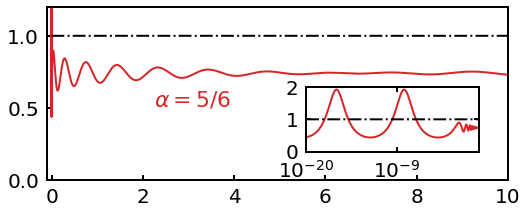

In [26]:
######################   Figure 4    ##################################################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19#J

r=10
EE_1=1/10**np.arange(20,0,-0.01)
EE_2=np.arange(1,10,0.01)#np.exp(np.arange(-20,1,0.01))
EE=np.append(EE_1,EE_2)
Alpha=np.array([5/6])
ll=np.arange(-50,50,1)

Num_E=np.size(EE)
Num_l=np.size(ll)
Num_Alpha=np.size(Alpha)

LDOS=np.zeros((Num_Alpha,Num_E))

for k in np.arange(0,Num_Alpha):
              
    alpha=Alpha[k]
    tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha
    for i in np.arange(0,Num_E):

        E=EE[i]

        x_1=np.sqrt(E)*r
        x_2=np.sqrt(E)

        for j in np.arange(0,Num_l):
            l=ll[j]
            if l==0:
                LDOS[k,i]=LDOS[k,i]+((G_1j_nu_0(tilde_alpha,x_2)*F_1j_nu_0(tilde_alpha,x_1)-F_1j_nu_0(tilde_alpha,x_2)*G_1j_nu_0(tilde_alpha,x_1))/np.sqrt(G_1j_nu_0(tilde_alpha,x_2)**2+F_1j_nu_0(tilde_alpha,x_2)**2))**2
            else:
                tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
                LDOS[k,i]=LDOS[k,i]+(special.jv(tilde_nu,x_1))**2 
EEE=EE
LDOS_3=np.ones(Num_E)

fig = plt.figure()
fig.set_size_inches(8, 3)

left, bottom, width, height = 0.15,0.15,0.8,0.8
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(EEE,LDOS[0,:],'tab:red',linewidth=2)
# ax1.plot(EEE,LDOS[1,:],'tab:purple',linewidth=2)
ax1.plot(EEE,LDOS_3,'k-.',linewidth=2)
#ax1.legend(prop={"size":16},loc='lower right')
ax1.set_xlim([-0.1,10])
ax1.set_ylim([0,1.2])
ax1.set_xticks([0,2,4,6,8,10])
ax1.set_yticks([0,0.5,1.0])
# ax1.set_xticklabels(fontsize=14)
# ax1.set_yticklabels(fontsize=14)
ax1.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='y', which='major', labelsize=20)
# ax1.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax1.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax1.text(0.4, 0.4,r'$\alpha=5/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='tab:red', fontsize=22)
# ax1.text(0.3, 0.1,r'$\alpha=0.01$',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='tab:blue', fontsize=22)
plt.setp(ax1.spines.values(), linewidth=2)
ax1.xaxis.set_tick_params(width=2,length=5)
ax1.yaxis.set_tick_params(width=2,length=5)
left, bottom, width, height = 0.6,0.28,0.3,0.3
ax2 = fig.add_axes([left,bottom,width,height])
# ax2.plot(EEE[:1000],LDOS[0,:1000],'tab:red',linewidth=2)
# # ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
# ax2.plot(EEE[:1000],LDOS_3[:1000],'k-.',linewidth=2)
ax2.plot(EEE,LDOS[0,:],'tab:red',linewidth=2)
# ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
ax2.plot(EEE,LDOS_3,'k-.',linewidth=2)
ax2.set_xscale('log')
ax2.set_yticks([0,1,2])
ax2.tick_params(top='on',bottom='on',left='on',right='on')
ax2.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax2.spines.values(), linewidth=2)
ax2.xaxis.set_tick_params(width=2,length=5)
ax2.yaxis.set_tick_params(width=2,length=5)
# ax2.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax2.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Fig4-b.pdf')

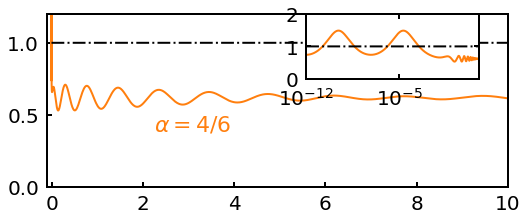

In [34]:
######################   Figure 4    ##################################################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19#J

r=10
EE_1=1/10**np.arange(12,0,-0.01)
EE_2=np.arange(1,10,0.01)#np.exp(np.arange(-20,1,0.01))
EE=np.append(EE_1,EE_2)
Alpha=np.array([4/6])
ll=np.arange(-50,50,1)

Num_E=np.size(EE)
Num_l=np.size(ll)
Num_Alpha=np.size(Alpha)

LDOS=np.zeros((Num_Alpha,Num_E))

for k in np.arange(0,Num_Alpha):
              
    alpha=Alpha[k]
    tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha
    for i in np.arange(0,Num_E):

        E=EE[i]

        x_1=np.sqrt(E)*r
        x_2=np.sqrt(E)

        for j in np.arange(0,Num_l):
            l=ll[j]
            if l==0:
                LDOS[k,i]=LDOS[k,i]+((G_1j_nu_0(tilde_alpha,x_2)*F_1j_nu_0(tilde_alpha,x_1)-F_1j_nu_0(tilde_alpha,x_2)*G_1j_nu_0(tilde_alpha,x_1))/np.sqrt(G_1j_nu_0(tilde_alpha,x_2)**2+F_1j_nu_0(tilde_alpha,x_2)**2))**2
            else:
                tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
                LDOS[k,i]=LDOS[k,i]+(special.jv(tilde_nu,x_1))**2 
EEE=EE
LDOS_3=np.ones(Num_E)

fig = plt.figure()
fig.set_size_inches(8, 3)

left, bottom, width, height = 0.15,0.15,0.8,0.8
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(EEE,LDOS[0,:],'tab:orange',linewidth=2)
# ax1.plot(EEE,LDOS[1,:],'tab:purple',linewidth=2)
ax1.plot(EEE,LDOS_3,'k-.',linewidth=2)
#ax1.legend(prop={"size":16},loc='lower right')
ax1.set_xlim([-0.1,10])
ax1.set_ylim([0.4,1.2])
ax1.set_xticks([0,2,4,6,8,10])
ax1.set_yticks([0,0.5,1.0])
# ax1.set_xticklabels(fontsize=14)
# ax1.set_yticklabels(fontsize=14)
ax1.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='y', which='major', labelsize=20)
# ax1.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax1.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax1.text(0.4, 0.3,r'$\alpha=4/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='tab:orange', fontsize=22)
# ax1.text(0.3, 0.1,r'$\alpha=0.01$',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='tab:blue', fontsize=22)
plt.setp(ax1.spines.values(), linewidth=2)
ax1.xaxis.set_tick_params(width=2,length=5)
ax1.yaxis.set_tick_params(width=2,length=5)
left, bottom, width, height = 0.6,0.65,0.3,0.3
ax2 = fig.add_axes([left,bottom,width,height])
# ax2.plot(EEE[:3000],LDOS[0,:3000],'tab:orange',linewidth=2)
# # ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
# ax2.plot(EEE[:3000],LDOS_3[:3000],'k-.',linewidth=2)
ax2.plot(EEE,LDOS[0,:],'tab:orange',linewidth=2)
# ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
ax2.plot(EEE,LDOS_3,'k-.',linewidth=2)
ax2.set_xscale('log')
ax2.set_yticks([0,1,2])
ax2.tick_params(top='on',bottom='on',left='on',right='on')
ax2.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax2.spines.values(), linewidth=2)
ax2.xaxis.set_tick_params(width=2,length=5)
ax2.yaxis.set_tick_params(width=2,length=5)
# ax2.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax2.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Fig4-c.pdf')

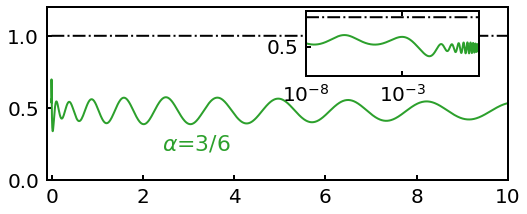

In [35]:
######################   Figure 4     ##################################################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19#J

r=10
EE_1=1/10**np.arange(8,0,-0.01)
EE_2=np.arange(1,10,0.01)#np.exp(np.arange(-20,1,0.01))
EE=np.append(EE_1,EE_2)
Alpha=np.array([3/6])
ll=np.arange(-50,50,1)

Num_E=np.size(EE)
Num_l=np.size(ll)
Num_Alpha=np.size(Alpha)

LDOS=np.zeros((Num_Alpha,Num_E))

for k in np.arange(0,Num_Alpha):
              
    alpha=Alpha[k]
    tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha
    for i in np.arange(0,Num_E):

        E=EE[i]

        x_1=np.sqrt(E)*r
        x_2=np.sqrt(E)

        for j in np.arange(0,Num_l):
            l=ll[j]
            if l==0:
                LDOS[k,i]=LDOS[k,i]+((G_1j_nu_0(tilde_alpha,x_2)*F_1j_nu_0(tilde_alpha,x_1)-F_1j_nu_0(tilde_alpha,x_2)*G_1j_nu_0(tilde_alpha,x_1))/np.sqrt(G_1j_nu_0(tilde_alpha,x_2)**2+F_1j_nu_0(tilde_alpha,x_2)**2))**2
            else:
                tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
                LDOS[k,i]=LDOS[k,i]+(special.jv(tilde_nu,x_1))**2 
EEE=EE
LDOS_3=np.ones(Num_E)

fig = plt.figure()
fig.set_size_inches(8, 3)

left, bottom, width, height = 0.15,0.15,0.8,0.8
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(EEE,LDOS[0,:],'tab:green',linewidth=2)
# ax1.plot(EEE,LDOS[1,:],'tab:purple',linewidth=2)
ax1.plot(EEE,LDOS_3,'k-.',linewidth=2)
#ax1.legend(prop={"size":16},loc='lower right')
ax1.set_xlim([-0.1,10])
ax1.set_ylim([0.4,1.2])
ax1.set_xticks([0,2,4,6,8,10])
ax1.set_yticks([0,0.5,1.0])
# ax1.set_xticklabels(fontsize=14)
# ax1.set_yticklabels(fontsize=14)
ax1.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='y', which='major', labelsize=20)
# ax1.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax1.set_ylabel(r'$N(E,\rho)$',fontsize=16)
# ax1.text(0.4, 0.2,r'$\alpha$='+str(alpha),
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax1.transAxes,
#         color='tab:green', fontsize=22)
ax1.text(0.4, 0.15,r'$\alpha$=3/6',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='tab:green', fontsize=22)
# ax1.text(0.3, 0.1,r'$\alpha=0.01$',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='tab:blue', fontsize=22)
plt.setp(ax1.spines.values(), linewidth=2)
ax1.xaxis.set_tick_params(width=2,length=5)
ax1.yaxis.set_tick_params(width=2,length=5)
left, bottom, width, height = 0.6,0.63,0.3,0.3
ax2 = fig.add_axes([left,bottom,width,height])
# ax2.plot(EEE[:1000],LDOS[0,:1000],'tab:green',linewidth=2)
# # ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
# ax2.plot(EEE[:1000],LDOS_3[:1000],'k-.',linewidth=2)
ax2.plot(EEE,LDOS[0,:],'tab:green',linewidth=2)
# ax2.plot(EEE[:3000],LDOS[1,:3000],'tab:purple',linewidth=2)
ax2.plot(EEE,LDOS_3,'k-.',linewidth=2)
ax2.set_xscale('log')
ax2.set_yticks([0.5])
ax2.set_ylim([0,1.1])
ax2.tick_params(top='on',bottom='on',left='on',right='on')
ax2.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax2.spines.values(), linewidth=2)
ax2.xaxis.set_tick_params(width=2,length=5)
ax2.yaxis.set_tick_params(width=2,length=5)
# ax2.set_xlabel(r'$E/(eV)$',fontsize=16)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=16)
ax2.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Fig4-d.pdf')

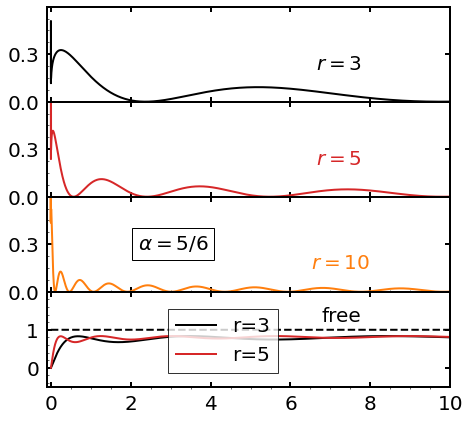

In [3]:
###############################   Figure 5     ##############################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19

R=np.array([3,5,10])
EE_1=1/10**np.arange(40,0,-0.01)
EE_2=np.arange(1,10,0.01)#np.exp(np.arange(-20,1,0.01))
EE=np.append(EE_1,EE_2)
alpha=5/6
ll=np.arange(-50,50,1)

Num_rho=np.size(R)
Num_E=np.size(EE)
Num_l=np.size(ll)
LDOS_normal=np.zeros((Num_rho,Num_E))
LDOS=np.zeros((Num_rho,Num_E))
tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha
for kk in np.arange(0,Num_rho):
    r=R[kk]
    for i in np.arange(0,Num_E):
        E=EE[i]
        x_1=np.sqrt(E)*r
        x_2=np.sqrt(E)
        LDOS[kk,i]=LDOS[kk,i]+((G_1j_nu_0(tilde_alpha,x_2)*F_1j_nu_0(tilde_alpha,x_1)-F_1j_nu_0(tilde_alpha,x_2)*G_1j_nu_0(tilde_alpha,x_1))/np.sqrt(G_1j_nu_0(tilde_alpha,x_2)**2+F_1j_nu_0(tilde_alpha,x_2)**2))**2
        for j in np.arange(0,Num_l):
            l=ll[j]
            if l != 0:
                tilde_nu=np.sqrt(l**2/alpha**2-(1-alpha**2)/(4*alpha**2))
                LDOS_normal[kk,i]=LDOS_normal[kk,i]+(special.jv(tilde_nu,x_1))**2
        
EEE=EE

import matplotlib.ticker as tck

fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 6)

# ax4 = fig.add_axes([0.2, 0.77, 0.7, 0.22],
#                    xticklabels=[], ylim=(0,0.7))
# ax3 = fig.add_axes([0.2, 0.55, 0.7, 0.22],
#                    xticklabels=[], ylim=(0,0.7))
# ax2 = fig.add_axes([0.2, 0.33, 0.7, 0.22],
#                    xticklabels=[], ylim=(0,0.7))
# ax1 = fig.add_axes([0.2, 0.11, 0.7, 0.22],
#                    ylim=(0,0.7))

ax3 = fig.add_axes([0.2, 0.77, 0.7, 0.22],
                   xticklabels=[], ylim=(0,0.7))
ax2 = fig.add_axes([0.2, 0.55, 0.7, 0.22],
                   xticklabels=[], ylim=(0,0.7))
ax1 = fig.add_axes([0.2, 0.33, 0.7, 0.22],
                   xticklabels=[], ylim=(0,0.7))
ax4 = fig.add_axes([0.2, 0.11, 0.7, 0.22],
                   ylim=(0,0.7))


ax4.minorticks_on()
ax3.minorticks_on()
ax2.minorticks_on()
ax1.minorticks_on()

ax4.plot(EEE,LDOS_normal[0,:],color='k',label='r=3',linewidth=2)
ax4.plot(EEE,LDOS_normal[1,:],color='tab:red',label='r=5',linewidth=2)
# ax4.plot(EEE,LDOS_normal[2,:],color='tab:green')
ax4.plot(EEE,np.ones(np.size(LDOS_normal[0,:])),color='k', linestyle='dashed',linewidth=2)
ax4.legend(fontsize=20,loc=[0.3,0.15], edgecolor='k',fancybox=False)
ax3.plot(EEE,LDOS[0,:],color='k',linewidth=2)
ax2.plot(EEE,LDOS[1,:],color='tab:red',linewidth=2)
ax1.plot(EEE,LDOS[2,:],color='tab:orange',linewidth=2)

ax4.text(0.78, 0.65,'free',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='k', fontsize=20)
ax3.text(0.78, 0.3,r'$r=3$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='k', fontsize=20)
ax2.text(0.78, 0.3,r'$r=5$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='tab:red', fontsize=20)
ax1.text(0.8, 0.2,r'$r=10$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='tab:orange', fontsize=20)
props = dict(boxstyle='square', facecolor='white', edgecolor='k',alpha=1)
ax1.text(0.4, 0.4,r'$\alpha=5/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='k', fontsize=20,bbox=props)

# prop = dict(arrowstyle="->,head_width=0.6,head_length=1", color='b',
#             shrinkA=0,shrinkB=0,linewidth=2)
# ax3.annotate("", xy=(0.1,0.45), xytext=(0.5,0.6), arrowprops=prop)
# ax2.annotate("", xy=(0.1,0.45), xytext=(0.5,0.6), arrowprops=prop)
# ax1.annotate("", xy=(0.1,0.45), xytext=(0.5,0.6), arrowprops=prop)

ax1.set_xticks(np.arange(-2,12,2))
ax1.set_yticks([0,0.3])
ax2.set_yticks([0,0.3])
ax3.set_yticks([0,0.3])
ax4.set_yticks([0,1])

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)

ax1.set_xlim(-0.1,10)
ax2.set_xlim(-0.1,10)
ax3.set_xlim(-0.1,10)
ax4.set_xlim(-0.1,10)

ax1.set_ylim(0,0.6)
ax2.set_ylim(0,0.6)
ax3.set_ylim(0,0.6)
ax4.set_ylim(-0.5,2)

ax4.tick_params(top='on',bottom='off',left='on',right='on')
ax3.tick_params(top='on',bottom='off',left='on',right='on')
ax2.tick_params(top='off',bottom='off',left='on',right='on')
ax1.tick_params(top='off',bottom='on',left='on',right='on')

#tick_params(which='major',direction='in')
ax4.tick_params(axis="y",direction="in", pad=8)
ax3.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)

ax4.tick_params(axis="x",direction="in", pad=8)
ax3.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="x",direction="in", pad=8)

ax4.tick_params(which="minor",axis="y",direction="in", pad=8)
ax3.tick_params(which="minor",axis="y",direction="in", pad=8)
ax2.tick_params(which="minor",axis="y",direction="in", pad=8)
ax1.tick_params(which="minor",axis="y",direction="in", pad=8)

ax1.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax2.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax3.tick_params(which="minor",axis="x",direction="in", pad=8)

# ax1.set_xlabel('E/(eV)',fontsize=18)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=18)

#ax1.legend(['Collapse'],loc='center',fontsize=18,handlelength=0)

plt.setp(ax4.spines.values(), linewidth=2)
plt.setp(ax3.spines.values(), linewidth=2)
plt.setp(ax2.spines.values(), linewidth=2)
plt.setp(ax1.spines.values(), linewidth=2)

ax4.xaxis.set_tick_params(width=2,length=5)
ax4.yaxis.set_tick_params(width=2,length=5)

ax3.xaxis.set_tick_params(width=2,length=5)
ax3.yaxis.set_tick_params(width=2,length=5)

ax2.xaxis.set_tick_params(width=2,length=5)
ax2.yaxis.set_tick_params(width=2,length=5)

ax1.xaxis.set_tick_params(width=2,length=5)
ax1.yaxis.set_tick_params(width=2,length=5)

plt.savefig('Fig5-a-b-c-d.pdf')

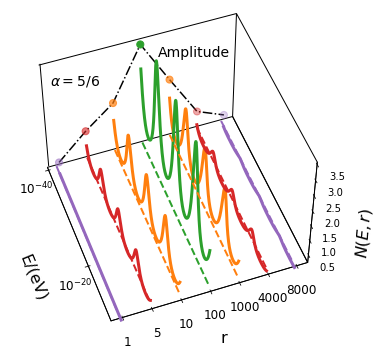

In [18]:
######################   Figure 5     ##################################################################

from mpl_toolkits import mplot3d
from scipy.signal import find_peaks

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

alpha=5/6
tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha

E=1/10**np.arange(40,10,-0.1)
Rho=np.array([1,5,10,100,1000,4000,8000])
R=np.zeros((np.size(Rho),np.size(E)))
peaks=np.zeros(np.size(Rho))
valley=np.zeros(np.size(Rho))
amplitudes=np.zeros(np.size(Rho))
for i in np.arange(0,np.size(Rho),1):
    rho=Rho[i]
    R[i,:]=((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))/np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))**2
    if np.amax(R[i,:])==0:
        amplitudes[i]=0
    else:
        t1, _ = find_peaks(R[i,:]) 
        t2, _ = find_peaks(-R[i,:])
        peaks[i]=R[i,np.amax(t1)]
        valley[i]=R[i,np.amax(t2)]
        amplitudes[i]=peaks[i]-valley[i]
    
fig = plt.figure()
ax = plt.axes(projection ='3d')
fig.set_size_inches(8, 6)
# plotting
ax.plot3D(-40*np.ones(7), [1,3,5,7,9,11,13], amplitudes+0.4, 'k-.')
ax.scatter3D(-40*np.ones(7), [1,3,5,7,9,11,13], amplitudes+0.4, c=['tab:purple','tab:red','tab:orange','tab:green','tab:orange','tab:red','tab:purple'],s=50*np.ones(7))
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.plot3D(np.log10(E), 1*np.ones(np.size(E)), R[0,:], 'tab:purple',linewidth=3)
ax.plot3D(np.log10(E), 3*np.ones(np.size(E)), R[1,:], 'tab:red',linewidth=3)
ax.plot3D(np.log10(E), 5*np.ones(np.size(E)), R[2,:], 'tab:orange',linewidth=3)
ax.plot3D(np.log10(E), 9*np.ones(np.size(E)), R[4,:], 'tab:orange',linewidth=3)
ax.plot3D(np.log10(E), 7*np.ones(np.size(E)), R[3,:], 'tab:green',linewidth=3)
ax.plot3D(np.log10(E), 11*np.ones(np.size(E)), R[5,:], 'tab:red',linewidth=3)
ax.plot3D(np.log10(E), 13*np.ones(np.size(E)), R[6,:], 'tab:purple',linewidth=3)

# ax.plot3D(np.log10(E), 11*np.ones(np.size(E)), R[5,:], 'tab:red')
# ax.plot3D(np.log10(E), 13*np.ones(np.size(E)), R[6,:], 'tab:purple')
ax.plot3D([-40.5,-40.5], [0.31,0.31], [3.6,0.3],'k-',linewidth=1)
ax.plot3D(np.log10(E), 0.8*np.ones(np.size(E)), 0.3*np.ones(np.size(E)),'tab:purple',linestyle='dashed',linewidth=2)
ax.plot3D(np.log10(E), 3*np.ones(np.size(E)), 0.3*np.ones(np.size(E)), 'tab:red',linestyle='dashed',linewidth=2)
ax.plot3D(np.log10(E), 5*np.ones(np.size(E)), 0.3*np.ones(np.size(E)), 'tab:orange',linestyle='dashed',linewidth=2)
ax.plot3D(np.log10(E), 7*np.ones(np.size(E)), 0.3*np.ones(np.size(E)), 'tab:green',linestyle='dashed',linewidth=2)
ax.plot3D(np.log10(E), 9*np.ones(np.size(E)), 0.3*np.ones(np.size(E)), 'tab:orange',linestyle='dashed',linewidth=2)
ax.plot3D(np.log10(E), 11*np.ones(np.size(E)), 0.3*np.ones(np.size(E)), 'tab:red',linestyle='dashed',linewidth=2)
ax.plot3D(np.log10(E), 12.8*np.ones(np.size(E)), 0.3*np.ones(np.size(E)), 'tab:purple',linestyle='dashed',linewidth=2)

ax.grid(False)

ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.set_xlim(-40,-10)
ax.set_ylim(0.5,13.5)
ax.set_zlim(0.3,3.5)

ax.set_xticks([-20,-40])
ax.set_xticklabels([r'$10^{-20}$',r'$10^{-40}$'],fontsize=12)

ax.set_yticks([1,3,5,7,9,11,13])
ax.set_yticklabels([1,5,10,100,1000,4000,8000],fontsize=12)

ax.set_xlabel('E/(eV)',rotation=-10, fontsize=16, labelpad=20)
ax.set_ylabel('r', rotation=0, fontsize=16, labelpad=10)

ax.zaxis.set_rotate_label(False) 
ax.set_zlabel(r'$N(E,r)$', rotation=85, fontsize=16, labelpad=10)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)
#ax.zaxis.tick_right()
ax.text(-40,8.2,3,"Amplitude",fontsize=14)
ax.text(-40,0.8,3,r'$\alpha=5/6$',fontsize=14)
#props = dict(boxstyle='square', facecolor='white', edgecolor='k',alpha=1)
# ax.text(-40,3,3,r'$\alpha=\pi/2\times0.6$',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax1.transAxes,
#         color='k', fontsize=14,bbox=props)
ax.view_init(elev=50, azim=-20)
plt.savefig('Fig5-e.pdf')
#ax.set_axiscolor('white')

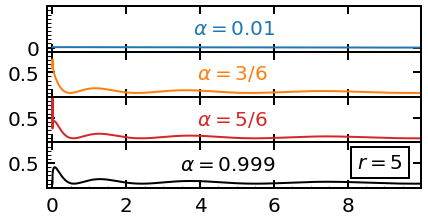

In [55]:
######################   Figure 6   ##################################################################

from mpl_toolkits import mplot3d
from scipy.signal import find_peaks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

Alpha=np.array([0.01,3/6,5/6,0.999])

E_1=1/10**np.arange(30,0,-0.01)
E_2=np.arange(1,10,0.01)
E=np.append(E_1,E_2)
rho=5
LDOS=np.zeros((np.size(Alpha),np.size(E)))
# peaks=np.zeros(np.size(aho))
# valley=np.zeros(np.size(Rho))
# amplitudes=np.zeros(np.size(Rho))
for i in np.arange(0,np.size(Alpha),1):
    tilde_alpha=np.sqrt(1-Alpha[i]**2)*0.5/Alpha[i]
    LDOS[i,:]=((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))/np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))**2
#     if np.amax(R[i,:])==0:
#         amplitudes[i]=0
#     else:
#         t1, _ = find_peaks(R[i,:]) 
#         t2, _ = find_peaks(-R[i,:])
#         peaks[i]=R[i,np.amax(t1)]
#         valley[i]=R[i,np.amax(t2)]
#         amplitudes[i]=peaks[i]-valley[i]
    
import matplotlib.ticker as tck

fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 3)

ax4 = fig.add_axes([0.2, 0.75, 0.65, 0.21])
ax3 = fig.add_axes([0.2, 0.54, 0.65, 0.21])
ax2 = fig.add_axes([0.2, 0.33, 0.65, 0.21])
ax1 = fig.add_axes([0.2, 0.12, 0.65, 0.21])

ax4.minorticks_on()
ax3.minorticks_on()
ax2.minorticks_on()
ax1.minorticks_on()

ax4.plot(E,LDOS[0,:],color='tab:blue',linewidth=2)
ax3.plot(E,LDOS[1,:],color='tab:orange',linewidth=2)
ax2.plot(E,LDOS[2,:],color='tab:red',linewidth=2)
ax1.plot(E,LDOS[3,:],color='k',linewidth=2)

# ax3.set_xscale('log')
# ax2.set_xscale('log')
# ax1.set_xscale('log')

ax4.text(0.61, .3,r'$\alpha=0.01$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='tab:blue', fontsize=20)
ax3.text(0.59, 0.3,r'$\alpha=3/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='tab:orange', fontsize=20)
ax2.text(0.59, 0.3,r'$\alpha=5/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='tab:red', fontsize=20)
ax1.text(0.61, 0.3,r'$\alpha=0.999$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='k', fontsize=20)
props = dict(boxstyle='square', facecolor='white', edgecolor='k',alpha=1,linewidth=2)
ax1.text(0.95, 0.35,r'$r=5$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='k', fontsize=20,bbox=props)

#ax1.set_xticks(1/10**np.arange(40,10,-10))
ax1.set_yticks([.5])
ax2.set_yticks([.5])
ax3.set_yticks([.5])
ax4.set_yticks([0])

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)

ax1.set_xlim(-.15,10)
ax2.set_xlim(-.15,10)
ax3.set_xlim(-.15,10)
ax4.set_xlim(-.15,10)

ax1.set_ylim(-0.1,1)
ax2.set_ylim(-0.1,1)
ax3.set_ylim(-0.1,1)
ax4.set_ylim(-0.1,1)

ax4.tick_params(top='on',bottom='off',left='on',right='on')
ax3.tick_params(top='on',bottom='off',left='on',right='on')
ax2.tick_params(top='off',bottom='off',left='on',right='on')
ax1.tick_params(top='off',bottom='on',left='on',right='on')

#tick_params(which='major',direction='in')
ax4.tick_params(axis="y",direction="in", pad=8)
ax3.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)

ax4.tick_params(axis="x",direction="in", pad=8)
ax3.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="x",direction="in", pad=8)

ax4.tick_params(which="minor",axis="y",direction="in", pad=8)
ax3.tick_params(which="minor",axis="y",direction="in", pad=8)
ax2.tick_params(which="minor",axis="y",direction="in", pad=8)
ax1.tick_params(which="minor",axis="y",direction="in", pad=8)

ax1.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax2.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax3.tick_params(which="minor",axis="x",direction="in", pad=8)

# ax1.set_xlabel('E/(eV)',fontsize=16)
# #ax3.set_ylabel(r'$N(E,\rho)$',fontsize=20)
# t = ax2.text(-0.1, 1, r'$N(E,\rho)$', rotation=90, fontsize=20,
#             verticalalignment='center', horizontalalignment='right', 
#             transform=ax2.transAxes)
ax1.set_xticks([0,2,4,6,8])
ax2.set_xticks([0,2,4,6,8])
ax3.set_xticks([0,2,4,6,8])
ax4.set_xticks([0,2,4,6,8])
ax1.set_xticklabels([0,2,4,6,8])

ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax3.yaxis.set_minor_locator(MultipleLocator(0.1))
ax4.yaxis.set_minor_locator(MultipleLocator(0.1))

# prop = dict(arrowstyle="->,head_width=0.6,head_length=1", color='b',
#             shrinkA=0,shrinkB=0,linewidth=2)
# ax3.annotate("", xy=(0.1,0.45), xytext=(0.7,0.8), arrowprops=prop)

# prop = dict(arrowstyle="->,head_width=0.6,head_length=1", color='b',
#             shrinkA=0,shrinkB=0,linewidth=2)
# ax2.annotate("", xy=(0.1,0.45), xytext=(0.7,0.8), arrowprops=prop)

# ax1.autoscale(enable=True, axis='x', tight=True)
# ax2.autoscale(enable=True, axis='x', tight=True)
# ax3.autoscale(enable=True, axis='x', tight=True)
# ax4.autoscale(enable=True, axis='x', tight=True)
#ax1.legend(['Collapse'],loc='center',fontsize=18,handlelength=0)

plt.setp(ax1.spines.values(), linewidth=2)
plt.setp(ax2.spines.values(), linewidth=2)
plt.setp(ax3.spines.values(), linewidth=2)
plt.setp(ax4.spines.values(), linewidth=2)

ax1.xaxis.set_tick_params(width=2,length=8)
ax1.yaxis.set_tick_params('major',width=2,length=8)
ax1.yaxis.set_tick_params('minor',width=1,length=4)

ax2.xaxis.set_tick_params(width=2,length=8)
ax2.yaxis.set_tick_params('major',width=2,length=8)
ax2.yaxis.set_tick_params('minor',width=1,length=4)

ax3.xaxis.set_tick_params(width=2,length=8)
ax3.yaxis.set_tick_params('major',width=2,length=8)
ax3.yaxis.set_tick_params('minor',width=1,length=4)

ax4.xaxis.set_tick_params(width=2,length=8)
ax4.yaxis.set_tick_params('major',width=2,length=8)
ax4.yaxis.set_tick_params('minor',width=1,length=4)

plt.savefig('Fig6-a.pdf')

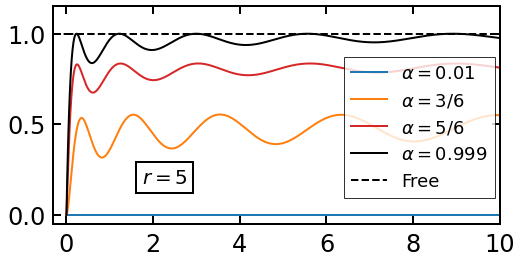

In [56]:
######################   Figure 6   ##################################################################

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19#J

rho=5
EE=np.arange(0,10,0.01)#np.exp(np.arange(-20,1,0.01))

# Rho=np.array([5*rho_0,10*rho_0,20*rho_0])
# alpha=np.pi/3

Alpha=np.array([0.01,3/6,5/6,0.999])
ll=np.arange(-50,50,1)

Num_E=np.size(EE)
Num_l=np.size(ll)
Num_alpha=np.size(Alpha)
LDOS=np.zeros((Num_alpha,Num_E))
LDOS_3=np.ones(Num_E)

for k in np.arange(0,Num_alpha):
    alpha=Alpha[k]
#     tilde_alpha=np.sqrt(1-alpha**2)*0.5/alpha
    for i in np.arange(0,Num_E):
        E=EE[i]
        x_1=np.sqrt(E)*rho
        for j in np.arange(0,Num_l):
            l=ll[j]
            if l != 0:
                tilde_nu=np.sqrt(l**2/alpha**2-(1-alpha**2)/(4*alpha**2))
                LDOS[k,i]=LDOS[k,i]+(special.jv(tilde_nu,x_1))**2
           
    
EEE=EE
fig = plt.figure()
fig.set_size_inches(8, 4)

plt.plot(EEE,LDOS[0,:],'tab:blue',label=r'$\alpha=0.01$',linewidth=2)
plt.plot(EEE,LDOS[1,:],'tab:orange',label=r'$\alpha=3/6$',linewidth=2)
plt.plot(EEE,LDOS[2,:],'tab:red',label=r'$\alpha=5/6$',linewidth=2)
plt.plot(EEE,LDOS[3,:],'k',label=r'$\alpha=0.999$',linewidth=2)

plt.plot(EEE,LDOS_3,color='k', linestyle='dashed',label='Free',linewidth=2)
plt.plot([-0.3,0],[1,1],color='k', linestyle='dashed',linewidth=2)
# plt.xlabel(r'$E/(eV)$',fontsize=20)
# plt.ylabel(r'$N(E,\rho)$',fontsize=20)
plt.xticks([0,2,4,6,8,10],fontsize=24)
plt.yticks([0,0.5,1.0],fontsize=24)
plt.ylim([-0.05,1.15])
plt.xlim([-0.3,10])

# plt.text(0.6, 0.01,r'$\alpha=\frac{\pi}{2}\times0.3$',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=plt.transAxes,
#         color='tab:blue', fontsize=16)

# plt.text(1.5, 0.27, r'$r=5$', fontsize=20)
plt.legend(fontsize=18,loc=[0.65,0.12], edgecolor='k',fancybox=False)
plt.tick_params(axis="y",direction="in", pad=8)
plt.tick_params(axis="x",direction="in", pad=8)
plt.tick_params(top='on',bottom='on',left='on',right='on')
ax=plt.gca()
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2,length=8)
ax.yaxis.set_tick_params('major',width=2,length=8)

props = dict(boxstyle='square', facecolor='white', edgecolor='k',alpha=1,linewidth=2)
ax.text(0.3, 0.17,r'$r=5$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='k', fontsize=20,bbox=props)
plt.savefig('Fig6-b.pdf')
#plt.xscale('log')

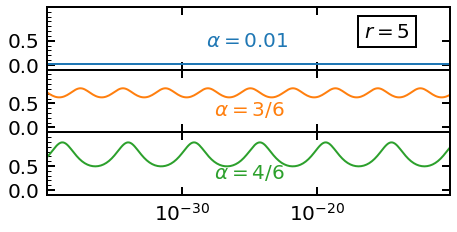

In [61]:
######################   Figure 6    ##################################################################

from mpl_toolkits import mplot3d
from scipy.signal import find_peaks

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

Alpha=np.array([0.01,3/6,4/6,5/6,0.99,0.999])

E=1/10**np.arange(40,10,-0.1)
rho=5
LDOS=np.zeros((np.size(Alpha),np.size(E)))
# peaks=np.zeros(np.size(aho))
# valley=np.zeros(np.size(Rho))
# amplitudes=np.zeros(np.size(Rho))
for i in np.arange(0,np.size(Alpha),1):
    tilde_alpha=np.sqrt(1-Alpha[i]**2)*0.5/Alpha[i]
    LDOS[i,:]=((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))/np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))**2
#     if np.amax(R[i,:])==0:
#         amplitudes[i]=0
#     else:
#         t1, _ = find_peaks(R[i,:]) 
#         t2, _ = find_peaks(-R[i,:])
#         peaks[i]=R[i,np.amax(t1)]
#         valley[i]=R[i,np.amax(t2)]
#         amplitudes[i]=peaks[i]-valley[i]
    
import matplotlib.ticker as tck

fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 3)

ax3 = fig.add_axes([0.2, 0.69, 0.7, 0.29])
ax2 = fig.add_axes([0.2, 0.4, 0.7, 0.29])
ax1 = fig.add_axes([0.2, 0.11, 0.7, 0.29])

ax3.minorticks_on()
ax2.minorticks_on()
ax1.minorticks_on()

ax3.plot(E,LDOS[0,:],color='tab:blue',linewidth=2)
ax2.plot(E,LDOS[1,:],color='tab:orange',linewidth=2)
ax1.plot(E,LDOS[2,:],color='tab:green',linewidth=2)

ax3.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xscale('log')

ax3.text(0.6, 0.3,r'$\alpha=0.01$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='tab:blue', fontsize=20)
ax2.text(0.59, 0.2,r'$\alpha=3/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='tab:orange', fontsize=20)
ax1.text(0.59, 0.2,r'$\alpha=4/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='tab:green', fontsize=20)
props = dict(boxstyle='square', facecolor='white', edgecolor='k',alpha=1,linewidth=2)
ax3.text(0.9, 0.45,r'$r=5$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='k', fontsize=20,bbox=props)

#ax1.set_xticks(1/10**np.arange(40,10,-10))
ax1.set_yticks([0,0.5])
ax2.set_yticks([0,0.5])
ax3.set_yticks([0,0.5])

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)

# ax1.set_xlim(-40,-10)
# ax2.set_xlim(-40,-10)
# ax3.set_xlim(-40,-10)

ax1.set_ylim(-0.1,1.2)
ax2.set_ylim(-0.1,1.2)
ax3.set_ylim(-0.1,1.2)

ax3.tick_params(top='on',bottom='off',left='on',right='on')
ax2.tick_params(top='off',bottom='off',left='on',right='on')
ax1.tick_params(top='off',bottom='on',left='on',right='on')

#tick_params(which='major',direction='in')
ax3.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)

ax3.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="x",direction="in", pad=8)

ax3.tick_params(which="minor",axis="y",direction="in", pad=8)
ax2.tick_params(which="minor",axis="y",direction="in", pad=8)
ax1.tick_params(which="minor",axis="y",direction="in", pad=8)

ax1.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax2.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax3.tick_params(which="minor",axis="x",direction="in", pad=8)

# ax1.set_xlabel('E/(eV)',fontsize=16)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=16)

ax1.set_xticks([1/10**30,1/10**20])
ax2.set_xticks([1/10**30,1/10**20])
ax3.set_xticks([1/10**30,1/10**20])
ax1.set_xticklabels([r'$10^{-30}$',r'$10^{-20}$'])

ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax3.autoscale(enable=True, axis='x', tight=True)
#ax1.legend(['Collapse'],loc='center',fontsize=18,handlelength=0)

plt.setp(ax1.spines.values(), linewidth=2)
plt.setp(ax2.spines.values(), linewidth=2)
plt.setp(ax3.spines.values(), linewidth=2)

ax1.xaxis.set_tick_params(width=2,length=8)
ax1.yaxis.set_tick_params('major',width=2,length=8)
ax1.yaxis.set_tick_params('minor',width=1,length=4)

ax2.xaxis.set_tick_params(width=2,length=8)
ax2.yaxis.set_tick_params('major',width=2,length=8)
ax2.yaxis.set_tick_params('minor',width=1,length=4)

ax3.xaxis.set_tick_params(width=2,length=8)
ax3.yaxis.set_tick_params('major',width=2,length=8)
ax3.yaxis.set_tick_params('minor',width=1,length=4)
plt.savefig('Fig6-c.pdf')

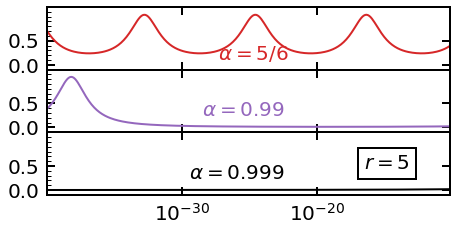

In [60]:
######################   Figure 6    ##################################################################

from mpl_toolkits import mplot3d
from scipy.signal import find_peaks

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

Alpha=np.array([0.01,3/6,4/6,5/6,0.99,0.999])

E=1/10**np.arange(40,10,-0.1)
rho=5
LDOS=np.zeros((np.size(Alpha),np.size(E)))
# peaks=np.zeros(np.size(aho))
# valley=np.zeros(np.size(Rho))
# amplitudes=np.zeros(np.size(Rho))
for i in np.arange(0,np.size(Alpha),1):
    tilde_alpha=np.sqrt(1-Alpha[i]**2)*0.5/Alpha[i]
    LDOS[i,:]=((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))/np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))**2
#     if np.amax(R[i,:])==0:
#         amplitudes[i]=0
#     else:
#         t1, _ = find_peaks(R[i,:]) 
#         t2, _ = find_peaks(-R[i,:])
#         peaks[i]=R[i,np.amax(t1)]
#         valley[i]=R[i,np.amax(t2)]
#         amplitudes[i]=peaks[i]-valley[i]
    
import matplotlib.ticker as tck

fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 3)

ax3 = fig.add_axes([0.2, 0.69, 0.7, 0.29])
ax2 = fig.add_axes([0.2, 0.4, 0.7, 0.29])
ax1 = fig.add_axes([0.2, 0.11, 0.7, 0.29])

ax3.minorticks_on()
ax2.minorticks_on()
ax1.minorticks_on()

ax3.plot(E,LDOS[3,:],color='tab:red',linewidth=2)
ax2.plot(E,LDOS[4,:],color='tab:purple',linewidth=2)
ax1.plot(E,LDOS[5,:],color='k',linewidth=2)

ax3.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xscale('log')

ax3.text(0.6, 0.1,r'$\alpha=5/6$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='tab:red', fontsize=20)
ax2.text(0.59, 0.2,r'$\alpha=0.99$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='tab:purple', fontsize=20)
ax1.text(0.59, 0.2,r'$\alpha=0.999$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='k', fontsize=20)
props = dict(boxstyle='square', facecolor='white', edgecolor='k',alpha=1,linewidth=2)
ax1.text(0.9, 0.35,r'$r=5$',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='k', fontsize=20,bbox=props)

#ax1.set_xticks(1/10**np.arange(40,10,-10))
ax1.set_yticks([0,0.5])
ax2.set_yticks([0,0.5])
ax3.set_yticks([0,0.5])

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)

# ax1.set_xlim(-40,-10)
# ax2.set_xlim(-40,-10)
# ax3.set_xlim(-40,-10)

ax1.set_ylim(-0.1,1.2)
ax2.set_ylim(-0.1,1.2)
ax3.set_ylim(-0.1,1.2)

ax3.tick_params(top='on',bottom='off',left='on',right='on')
ax2.tick_params(top='off',bottom='off',left='on',right='on')
ax1.tick_params(top='off',bottom='on',left='on',right='on')

#tick_params(which='major',direction='in')
ax3.tick_params(axis="y",direction="in", pad=8)
ax2.tick_params(axis="y",direction="in", pad=8)
ax1.tick_params(axis="y",direction="in", pad=8)

ax3.tick_params(axis="x",direction="in", pad=8)
ax2.tick_params(axis="x",direction="in", pad=8)
ax1.tick_params(axis="x",direction="in", pad=8)

ax3.tick_params(which="minor",axis="y",direction="in", pad=8)
ax2.tick_params(which="minor",axis="y",direction="in", pad=8)
ax1.tick_params(which="minor",axis="y",direction="in", pad=8)

ax1.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax2.tick_params(which="minor",axis="x",direction="in", pad=8)
# ax3.tick_params(which="minor",axis="x",direction="in", pad=8)

# ax1.set_xlabel('E/(eV)',fontsize=16)
# ax2.set_ylabel(r'$N(E,\rho)$',fontsize=16)

ax1.set_xticks([1/10**30,1/10**20])
ax2.set_xticks([1/10**30,1/10**20])
ax3.set_xticks([1/10**30,1/10**20])
ax1.set_xticklabels([r'$10^{-30}$',r'$10^{-20}$'])

ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax3.autoscale(enable=True, axis='x', tight=True)
#ax1.legend(['Collapse'],loc='center',fontsize=18,handlelength=0)

plt.setp(ax1.spines.values(), linewidth=2)
plt.setp(ax2.spines.values(), linewidth=2)
plt.setp(ax3.spines.values(), linewidth=2)

ax1.xaxis.set_tick_params(width=2,length=8)
ax1.yaxis.set_tick_params('major',width=2,length=8)
ax1.yaxis.set_tick_params('minor',width=1,length=4)

ax2.xaxis.set_tick_params(width=2,length=8)
ax2.yaxis.set_tick_params('major',width=2,length=8)
ax2.yaxis.set_tick_params('minor',width=1,length=4)

ax3.xaxis.set_tick_params(width=2,length=8)
ax3.yaxis.set_tick_params('major',width=2,length=8)
ax3.yaxis.set_tick_params('minor',width=1,length=4)
plt.savefig('Fig6-d.pdf')

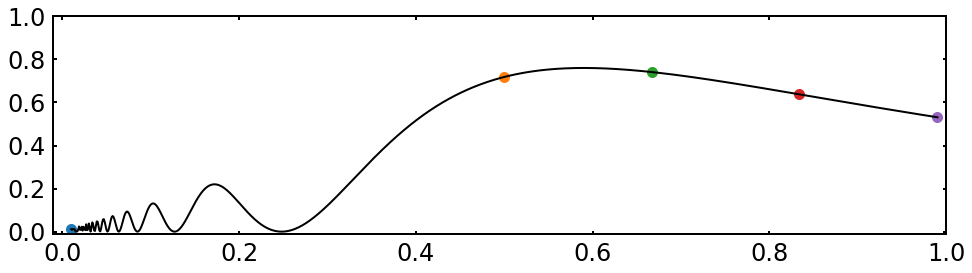

In [59]:
######################   Figure 6    ##################################################################

from mpl_toolkits import mplot3d
from scipy.signal import find_peaks
import numpy as np

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

Alpha=np.array([0.01,3/6,4/6,5/6,0.99])

E=1/10**np.arange(80,40,-0.1)
rho=5
R=np.zeros((np.size(Alpha),np.size(E)))
peaks=np.zeros(np.size(Alpha))
valley=np.zeros(np.size(Alpha))
amplitudes=np.zeros(np.size(Alpha))
for i in np.arange(0,np.size(Alpha),1):
    tilde_alpha=np.sqrt(1-Alpha[i]**2)*0.5/Alpha[i]
    R[i,:]=((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))/np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))**2
    if np.amax(R[i,:])==0:
        amplitudes[i]=0
    else:
        t1, _ = find_peaks(R[i,:]) 
        t2, _ = find_peaks(-R[i,:])
#         print(t1)
        peaks[i]=R[i,np.amax(t1)]
        valley[i]=R[i,np.amax(t2)]
        amplitudes[i]=(peaks[i]+valley[i])*0.5
    
# plt.scatter(Alpha,amplitudes)
Alpha_numerical = Alpha

###############################################################################################



Alpha=np.arange(0.01,0.99+0.001,0.001)
tilde_alpha=np.sqrt(1-Alpha**2)*0.5/Alpha

A=-np.sqrt(2/(tilde_alpha*np.pi))
B=1/np.tanh(tilde_alpha*np.pi/2)
C=2/np.sinh(tilde_alpha*np.pi)

r=5

Average=0.5*(1/B+1/(B-C))*A**2*np.sin(tilde_alpha*np.log(r))**2

fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(16, 4)

plt.scatter(Alpha_numerical[0],amplitudes[0],s=100,color='tab:blue',alpha=None)
plt.scatter(Alpha_numerical[1],amplitudes[1],s=100,color='tab:orange',alpha=None)
plt.scatter(Alpha_numerical[2],amplitudes[2],s=100,color='tab:green',alpha=None)
plt.scatter(Alpha_numerical[3],amplitudes[3],s=100,color='tab:red',alpha=None)
plt.scatter(Alpha_numerical[4],amplitudes[4],s=100,color='tab:purple',alpha=None)
plt.plot(Alpha,Average,linewidth=2,color='k')

plt.xticks(fontsize=24)
plt.yticks([0,0.2,0.4,0.6,0.8,1],fontsize=24)
plt.ylim([-0.01,1])
plt.xlim([-0.01,1])
plt.tick_params(top='on',bottom='on',left='on',right='on')
plt.tick_params(axis="y",direction="in", pad=8,width=2)
plt.tick_params(axis="x",direction="in", pad=8,width=2)
plt.tick_params(which="minor",axis="x",direction="in", pad=8,width=2,length=4)
plt.tick_params(which="minor",axis="y",direction="in", pad=8, width=2, length=4)

wid=2
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=wid)
ax.xaxis.set_tick_params(width=wid)

plt.savefig('Fig6-e.pdf')

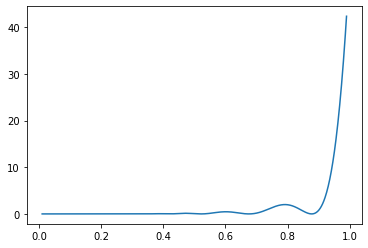

In [36]:
# Alpha=np.arange(0.01,0.99+0.001,0.001)
tilde_alpha=np.sqrt(1-Alpha**2)*0.5/Alpha

A=-np.sqrt(2/(tilde_alpha*np.pi))
B=1/np.tanh(tilde_alpha*np.pi/2)
C=2/np.sinh(tilde_alpha*np.pi)

r=100000

Amplitude=(1/(B-C)-1/B)*A**2*np.sin(tilde_alpha*np.log(r))**2

plt.plot(Alpha,Amplitude)

[1415.44246447]
epsilon[peaks[-1]] 6.309573444807053e-16
epsilon[peaks[-2]] 5.011872336276282e-19
epsilon[peaks[-2]]*factor_delta_epsilon [7.09401693e-16]


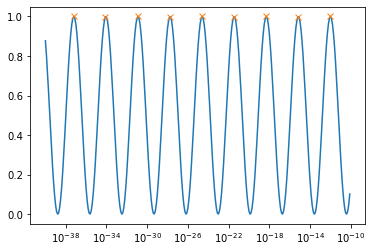

In [25]:
from scipy.signal import find_peaks

Alpha=np.array([0.5])
tilde_alpha=np.sqrt(1-Alpha**2)*0.5/Alpha

epsilon=1/10**np.arange(40,10,-0.1)
y=np.cos(tilde_alpha*np.log(np.sqrt(epsilon)*0.5))**2
peaks, _ = find_peaks(y, height=0)
plt.plot(epsilon,y)
plt.plot(epsilon[peaks], y[peaks], "x")
plt.xscale('log')

factor_delta_epsilon=np.exp(2*np.pi/tilde_alpha)
print(factor_delta_epsilon)
print("epsilon[peaks[-1]]",epsilon[peaks[-2]])
print("epsilon[peaks[-2]]",epsilon[peaks[-3]])
print("epsilon[peaks[-2]]*factor_delta_epsilon",epsilon[peaks[-3]]*factor_delta_epsilon)
# print(np.diff(epsilon[peaks]))

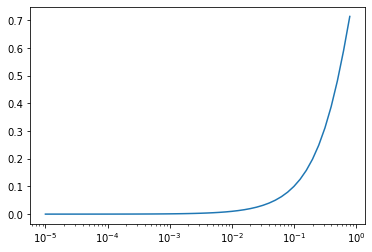

In [30]:
x=1/10**np.arange(5,0,-0.1)
y=np.sin(x)

plt.plot(x,y)
plt.xscale('log')

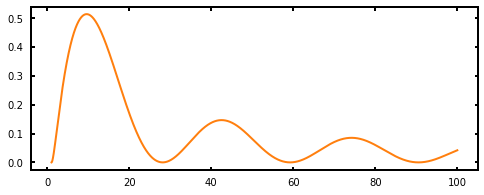

In [9]:
######################   Figure 3 ##################################################################


########################    parameter and data  ##########################################################
M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
E_0=1.6e-19#J
rho_0=2e-10#m

alpha=0.3*np.pi
tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)

E=0.01#np.exp(np.arange(-60,-10,0.1))
rho=np.arange(1,100,0.01)
R=np.absolute((G_1j_nu_0(tilde_alpha,np.sqrt(E))*F_1j_nu_0(tilde_alpha,np.sqrt(E)*rho)-\
               F_1j_nu_0(tilde_alpha,np.sqrt(E))*G_1j_nu_0(tilde_alpha,np.sqrt(E)*rho))\
              /np.sqrt(G_1j_nu_0(tilde_alpha,np.sqrt(E))**2+F_1j_nu_0(tilde_alpha,np.sqrt(E))**2))
# y=np.sqrt(2/(np.pi*np.sqrt(E)*rho))


########################   plot           ###################################################################
fig= plt.figure()
#fig.subplots_adjust(top=0.85)
fig.set_size_inches(8, 3)

plt.plot(rho,R**2,'tab:orange',linewidth=2)
# plt.plot(rho,y,'k--',linewidth=2)

# plt.xscale('log')
# plt.yscale('log')

# plt.ylim([0.05,1.5])
# plt.xlim([10,300])

############################   tick in and width   ########################################
# plt.xticks(fontsize=20)
# plt.yticks([0.05,0.1,1],fontsize=20)
plt.tick_params(top='on',bottom='on',left='on',right='on')
plt.tick_params(axis="y",direction="in", pad=8,width=2)
plt.tick_params(axis="x",direction="in", pad=8,width=2)
plt.tick_params(which="minor",axis="x",direction="in", pad=8,width=2,length=4)
plt.tick_params(which="minor",axis="y",direction="in", pad=8, width=2, length=4)

wid=2
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=wid)
ax.xaxis.set_tick_params(width=wid)

# plt.savefig('Fig3-a.pdf')

In [13]:
print(np.log(np.exp(1)))

1.0


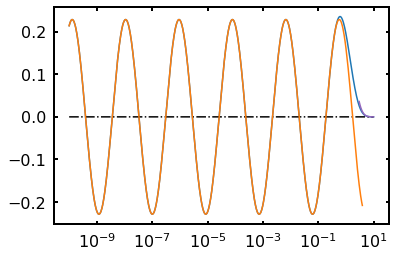

In [13]:
######  Figure 2 ##########################################
import numpy as np

###########################    parameter   ##################################################################################
M = 9.109e-31#kg
hbar = 1.055e-34#m^2kg/s
rho_0 = 2e-10#m
E_0 = 1.6e-19#J

alpha = 1/3
tilde_alpha = np.sqrt(1-alpha**2)*0.5/alpha
phi=np.angle(gamma(1+1j*tilde_alpha))

x_1 = 1/10**np.arange(10,0,-0.01)
x_2 = np.arange(1,10,0.1)
x_3 = np.arange(1,4,0.1)

############################    plot data   ###############################################################################
x_blue = np.append(x_1,x_2)
blue = K_1j_nu_0(tilde_alpha,x_blue)

x_purple = np.arange(3,10,0.1)
purple = np.sqrt(np.pi/2/x_purple)*np.exp(-x_purple)

x_orange = np.append(x_1,x_3)
orange = -np.sqrt(tilde_alpha*np.pi/np.sinh(tilde_alpha*np.pi))/tilde_alpha*np.sin(tilde_alpha*np.log(x_orange/2)-phi)

###############################   plot   ################################################################
plt.plot(x_blue, blue, color='tab:blue')
plt.plot(x_blue, 0*x_blue, 'k-.')
plt.plot(x_purple, purple, color='tab:purple')
plt.plot(x_orange, orange, color='tab:orange')


#######################  ticks in #################################################################
plt.tick_params(axis="y",direction="in", pad=8)
plt.tick_params(axis="x",direction="in", pad=8)
plt.tick_params(top='on',bottom='on',left='on',right='on')


#####################    width of axis ################################################
font=16
wid=2
ax = plt.gca()
plt.setp(ax.spines.values(), linewidth=wid)
ax.xaxis.set_tick_params(width=wid)
ax.yaxis.set_tick_params(width=wid)

###################    size of ticket label  ################################################
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.xscale('log')
plt.savefig('Fig2-a.pdf')